In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('flight.csv')
df.head(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

### Data Check

In [3]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat data null pada kolom : <br>
1. WORK_CITY            2269 data <br>
2. WORK_PROVINCE        3248 data <br>
3. WORK_COUNTRY           26 data <br>
4. AGE                   420 data <br>
5. SUM_YR_1              551 data <br>
6. SUM_YR_2              138 data <br>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Dari hasil pengecekan data didapatkan beberapa kolom yang tidak sesuai tipe datanya : <br>

1. FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME,LAST_FLIGHT_DATE seharusnya memiliki tipe data datetime   <br>

In [5]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
248        56497   6/17/2007         6/17/2007  Female         6   
447        17306   8/26/2009         4/29/2010    Male         5   
473          915  11/10/2006         1/26/2007    Male         5   
832        20336   7/13/2005          8/6/2005    Male         5   
1051       62884   5/24/2006         4/21/2007    Male         5   
...          ...         ...               ...     ...       ...   
61539      55995   1/11/2013         7/10/2013    Male         4   
61871      48742   7/26/2009         7/26/2009    Male         4   
61909       9190   4/11/2011         4/20/2011    Male         4   
62721      38776  10/31/2007         3/13/2008    Male         4   
62929      46449    2/7/2010         7/31/2010    Male         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  \
248       guangzhou     guangdong           CN  46.0  3/31/2014  ...   
447         haerbin  heilongjiang           CN  70.0  3/31/2014  ...   
473               .       beijing           CN  39.0  3/31/2014  ...   
832       guangzhou     guangdong           CN  40.0  3/31/2014  ...   
1051          wuhan         hubei           CN  50.0  3/31/2014  ...   
...             ...           ...          ...   ...        ...  ...   
61539     dalianshi      liaoning           CN  23.0  3/31/2014  ...   
61871       tianjin       tianjin           CN  37.0  3/31/2014  ...   
61909     guangzhou     guangdong           CN  34.0  3/31/2014  ...   
62721        foshan     guangdong           CN  42.0  3/31/2014  ...   
62929  guangzhoushi           NaN           CN  24.0  3/31/2014  ...   

       SUM_YR_2  SEG_KM_SUM    LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
248     70845.0       85000  2014/2/29  0:00:00           32     13.250000   
447     46323.0       69453  2014/2/29  0:00:00           32     22.766667   
473     30580.0       65717  2014/2/29  0:00:00           32     14.250000   
832     36417.0      114222  2014/2/29  0:00:00           32      8.696203   
1051    35680.0       49859  2014/2/29  0:00:00           32     19.115385   
...         ...         ...                 ...          ...           ...   
61539     955.0        3513  2014/2/29  0:00:00           32    117.000000   
61871     966.0        1298  2014/2/29  0:00:00           32    135.000000   
61909     853.0        2595  2014/2/29  0:00:00           32      1.000000   
62721     688.0        1199  2014/2/29  0:00:00           32     78.000000   
62929     401.0        1312  2014/2/29  0:00:00           32     43.000000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248             57               0      1.373478      132653                4  
447             75               6      1.375395      101413                7  
473             65               1      1.425974       93153                8  
832             34               2      0.664970       91476               15  
1051            72               4      1.388584       69047                4  
...            ...             ...           ...         ...              ...  
61539          211               0      0.276667           0                0  
61871          135               0      0.690000        1094                1  
61909            1               0      0.340000        3356               19  
62721           78               0      0.489525         276                0  
62929           43               0      0.275000        1211                3  

[421 rows x 23 columns]

In [6]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


Terdapat date yang berada pada range value yang tidak tepat yaitu 2014/2/29 karena bulan februari tahun 2014 hanya terdapat 28 hari pada kolom LAST_FLIGHT_DATE. Dari hasil pengecekan didapatkan bahwa jumlah data tersebut hanya 0.007 %, jumlah s=yang sangat kecil sehingga diputuskan data tersebut untuk di drop.

In [7]:
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [8]:
df[["FFP_DATE", "FIRST_FLIGHT_DATE","LOAD_TIME","LAST_FLIGHT_DATE"]] = df[["FFP_DATE", "FIRST_FLIGHT_DATE","LOAD_TIME","LAST_FLIGHT_DATE"]].astype("datetime64[ns]")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62567 non-null  int64         
 1   FFP_DATE           62567 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 3   GENDER             62564 non-null  object        
 4   FFP_TIER           62567 non-null  int64         
 5   WORK_CITY          60312 non-null  object        
 6   WORK_PROVINCE      59341 non-null  object        
 7   WORK_COUNTRY       62542 non-null  object        
 8   AGE                62148 non-null  float64       
 9   LOAD_TIME          62567 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62567 non-null  int64         
 11  BP_SUM             62567 non-null  int64         
 12  SUM_YR_1           62016 non-null  float64       
 13  SUM_YR_2           62429 non-null  float64       
 14  SEG_KM

In [10]:
df.duplicated().any()

False

Tidak ada Data yang duplicate

### Descriptive Statistic

In [11]:
#Pemisahan Data menjadi data numerik dan categorical
nums = df.select_dtypes(include = ['int64', 'float64']).columns
cats = df.select_dtypes(include = ['object']).columns

df_mode = pd.DataFrame({'mode' : [df[i].mode()[0] for i in nums]}).transpose()
df_mode.columns = df.describe().columns
pd.concat([df.describe(), df_mode])

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62567.000000  62567.000000  62148.000000  62567.000000   62567.000000   
mean   31490.970799      4.101971     42.481303     11.814391   10906.691786   
std    18176.932860      0.373871      9.886526     14.051878   16351.867568   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15756.500000      4.000000     35.000000      3.000000    2509.000000   
50%    31482.000000      4.000000     41.000000      7.000000    5681.000000   
75%    47229.500000      4.000000     48.000000     15.000000   12797.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   
mode       1.000000      4.000000     47.000000      2.000000       0.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62016.000000   62429.000000   62567.000000  62567.000000   
mean     5352.327839    5588.828205   17095.441159    177.089856   
std      8116.830365    8707.792799   20974.464921    184.057816   
min         0.000000       0.000000     368.000000      1.000000   
25%      1005.750000     768.000000    4732.000000     29.000000   
50%      2800.000000    2756.000000    9959.000000    109.000000   
75%      6567.000000    6815.000000   21206.000000    269.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   
mode        0.000000       0.000000    3934.000000      1.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  \
count  62567.000000  62567.000000    62567.000000  62567.000000   
mean      67.774899    165.886969        0.319306      0.721555   
std       77.606573    123.393978        1.137151      0.185485   
min        0.000000      0.000000        0.000000      0.000000   
25%       23.333333     79.000000        0.000000      0.611875   
50%       44.642857    143.000000        0.000000      0.711826   
75%       82.000000    227.000000        0.000000      0.809611   
max      728.000000    728.000000       46.000000      1.500000   
mode       2.000000      2.000000        0.000000      1.000000   

          Points_Sum  Point_NotFlight  
count   62567.000000     62567.000000  
mean    12524.515959         2.726533  
std     20524.415318         7.360838  
min         0.000000         0.000000  
25%      2764.000000         0.000000  
50%      6303.000000         0.000000  
75%     14249.000000         1.000000  
max    985572.000000       140.000000  
mode        0.000000         0.000000

Summary : <br>
1. Terdapat total 15 kolom pada data numerik <br> 
2. Pada kolom MEMBER_NO, FFP_TIER dan avg_discount memiliki nilai mean yang berdekatan dengan median sehingga dapat disinyalir data berdistribusi normal <br>
3. Mayoritas data berdistribusi Positively Skewed karena memiliki nilai mean > median, sehingga terdapat outliers <br>
4. Terdapat nilai 0 pada SUM_YR_1 (Fare Revenue) dan SUM_YR_2 ( Votes Prices) yang cukup aneh karena seharusnya normalnya tidak ada fare revenue dan vote price tidak 0, perlu dianalisa lebih lanjut <br>
5. Terdapat nilai 0 pada avg_discount yang cukup aneh karena seharusya nilai rata-rata normalnya tidak 0, perlu analisa lebih lanjut <br>
6. terdapat customer yang memiliki umur 110 tahun, perlu analisa lebih lanjut <br> 

In [12]:
df[cats].describe()

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY
count   62564      60312         59341        62542
unique      2       3225          1161          118
top      Male  guangzhou     guangdong           CN
freq    47806       9326         17395        57347

Summary : <br>
1. Terdapat 4 kolom untuk data categorical <br>
2. Gender male mendominasi dengan total sebanya 47806 <br>
3. Sebagian besar kolom memiliki ketimpangan data karena memiliki satu nilai unique yang sangat banyak dibandingkan nilai unique yang lain <br>

### Univariate Analysis

#### Boxplot

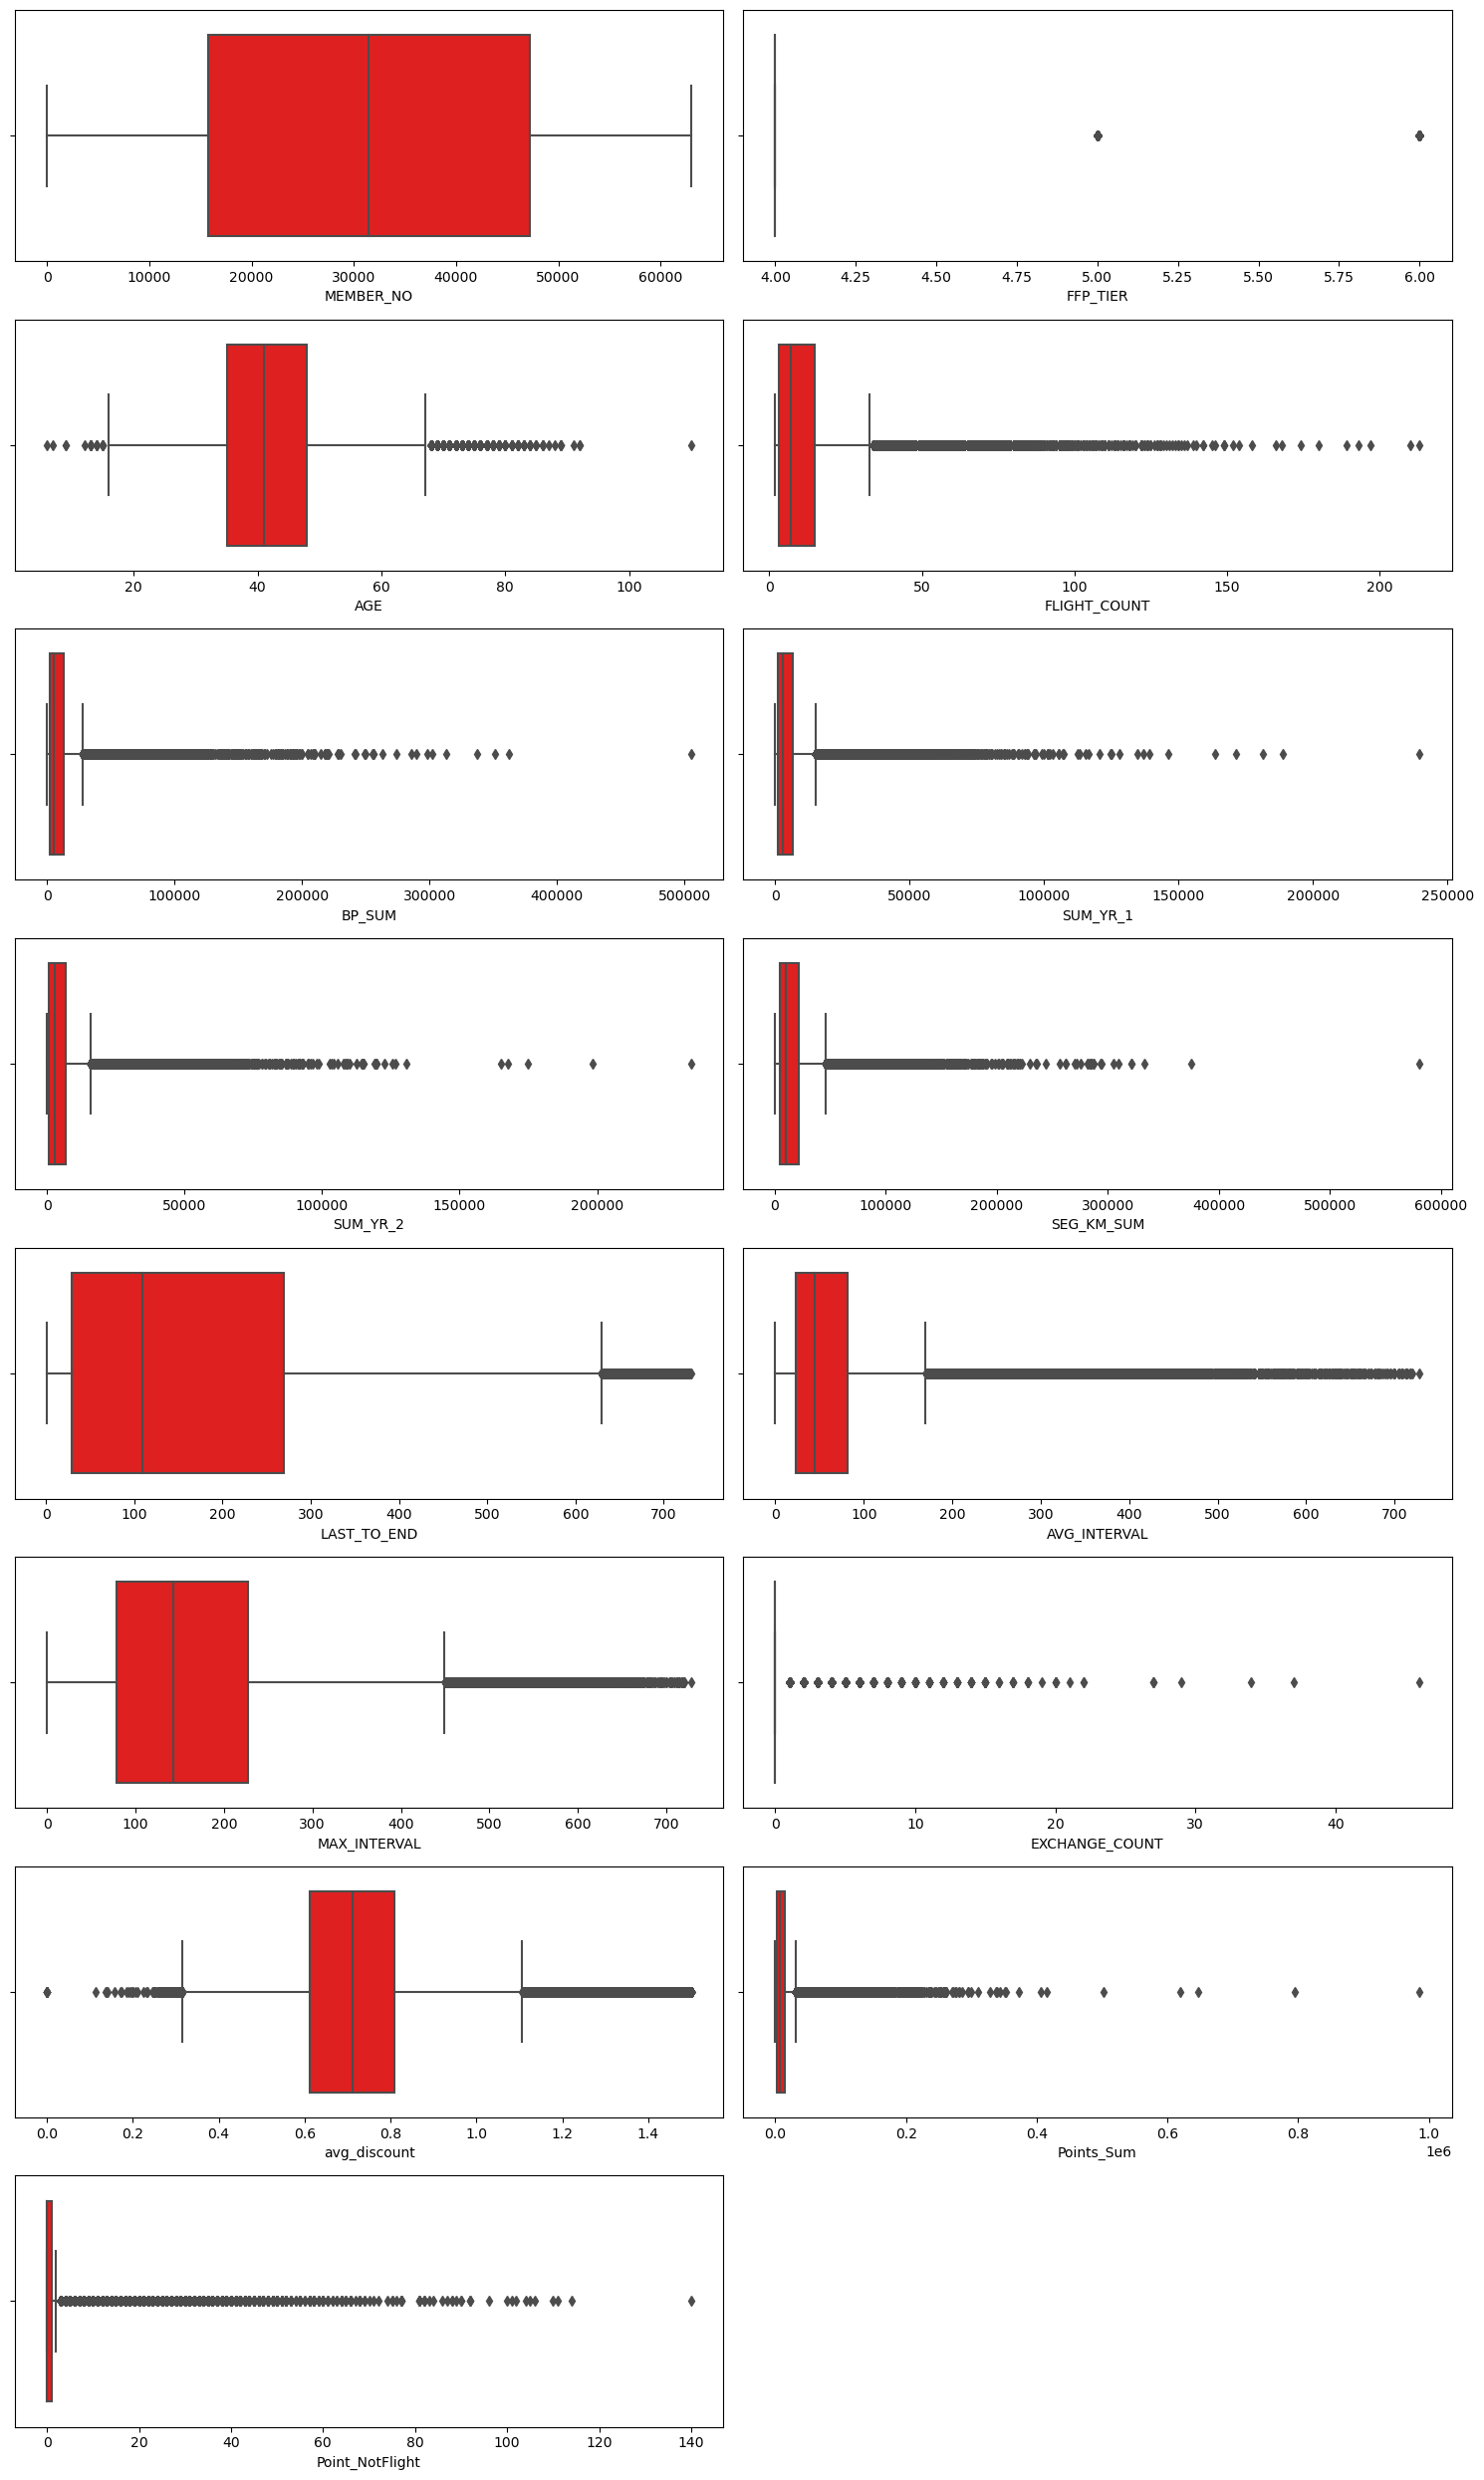

In [13]:
plt.figure(figsize = (15,25))
for i in range(0, len(nums)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[nums[i]], color='red')
    plt.tight_layout()

plt.show()


Mayoritas data terdapat outliers kecuali Pada kolom MEMBER_NO, FFP_TIER dan avg_discount


#### Dist Plot

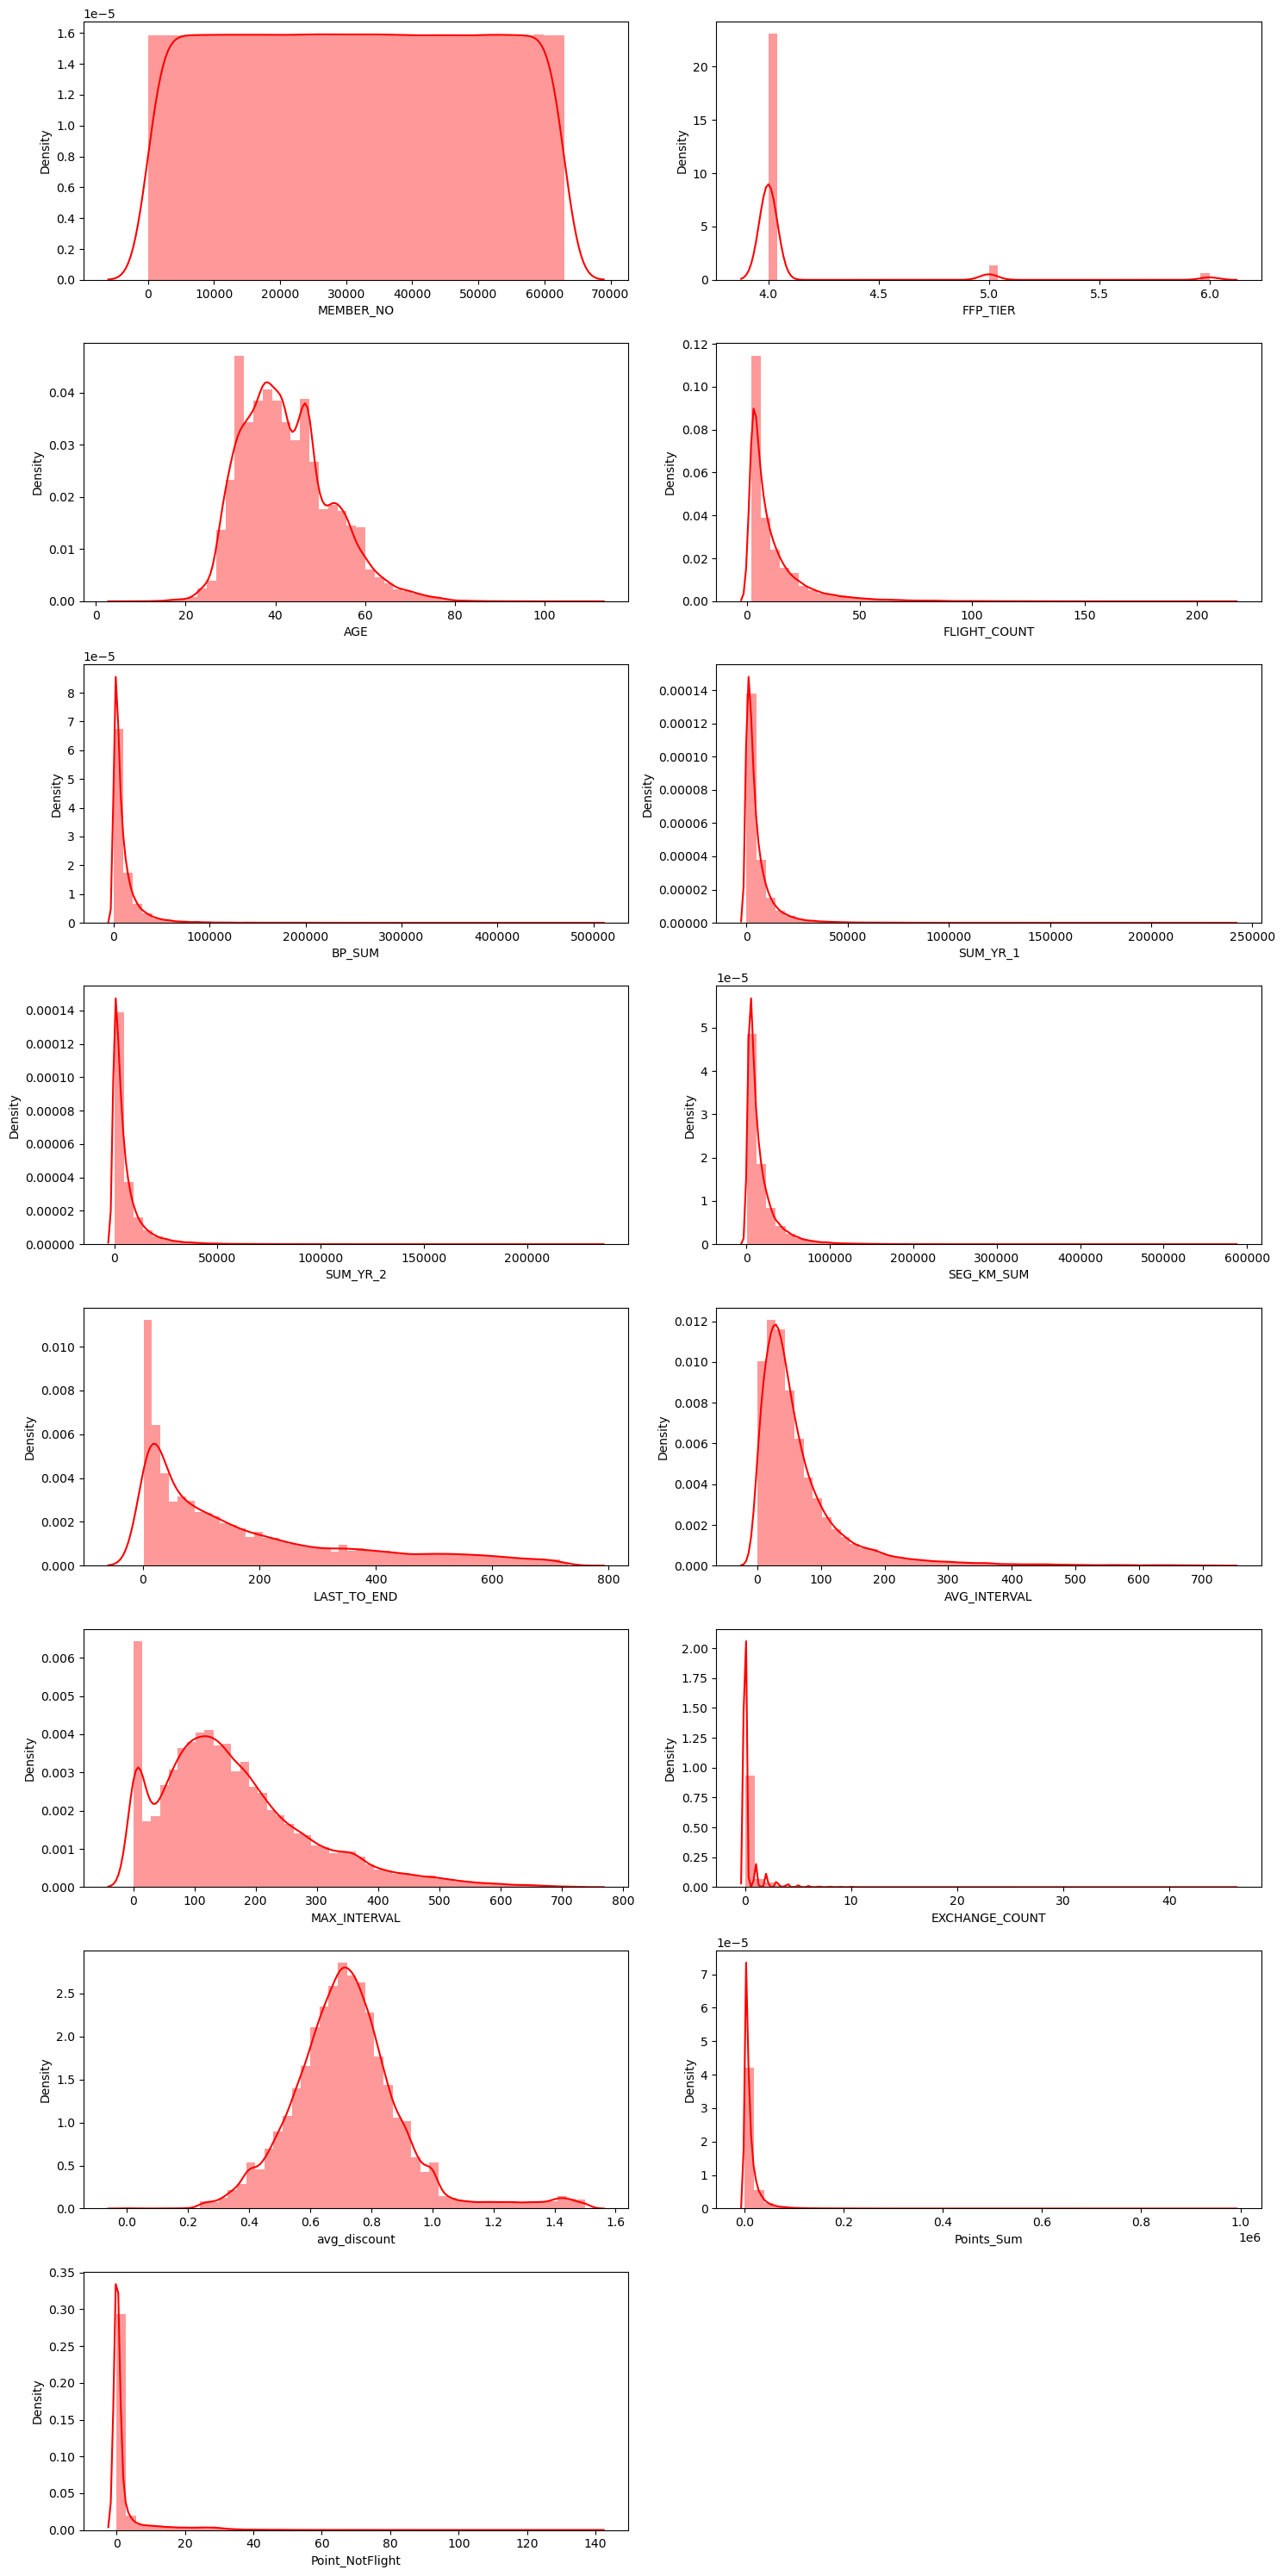

In [14]:
plt.figure(figsize=(15, 30))
for i in range(0, len(nums)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

Mayoritas data berdistribusi Positively Skewed karena memiliki nilai mean > median, sehingga terdapat outliers kecuali Pada kolom MEMBER_NO, FFP_TIER dan avg_discount

### Multivariate Analysis

### Heat Map

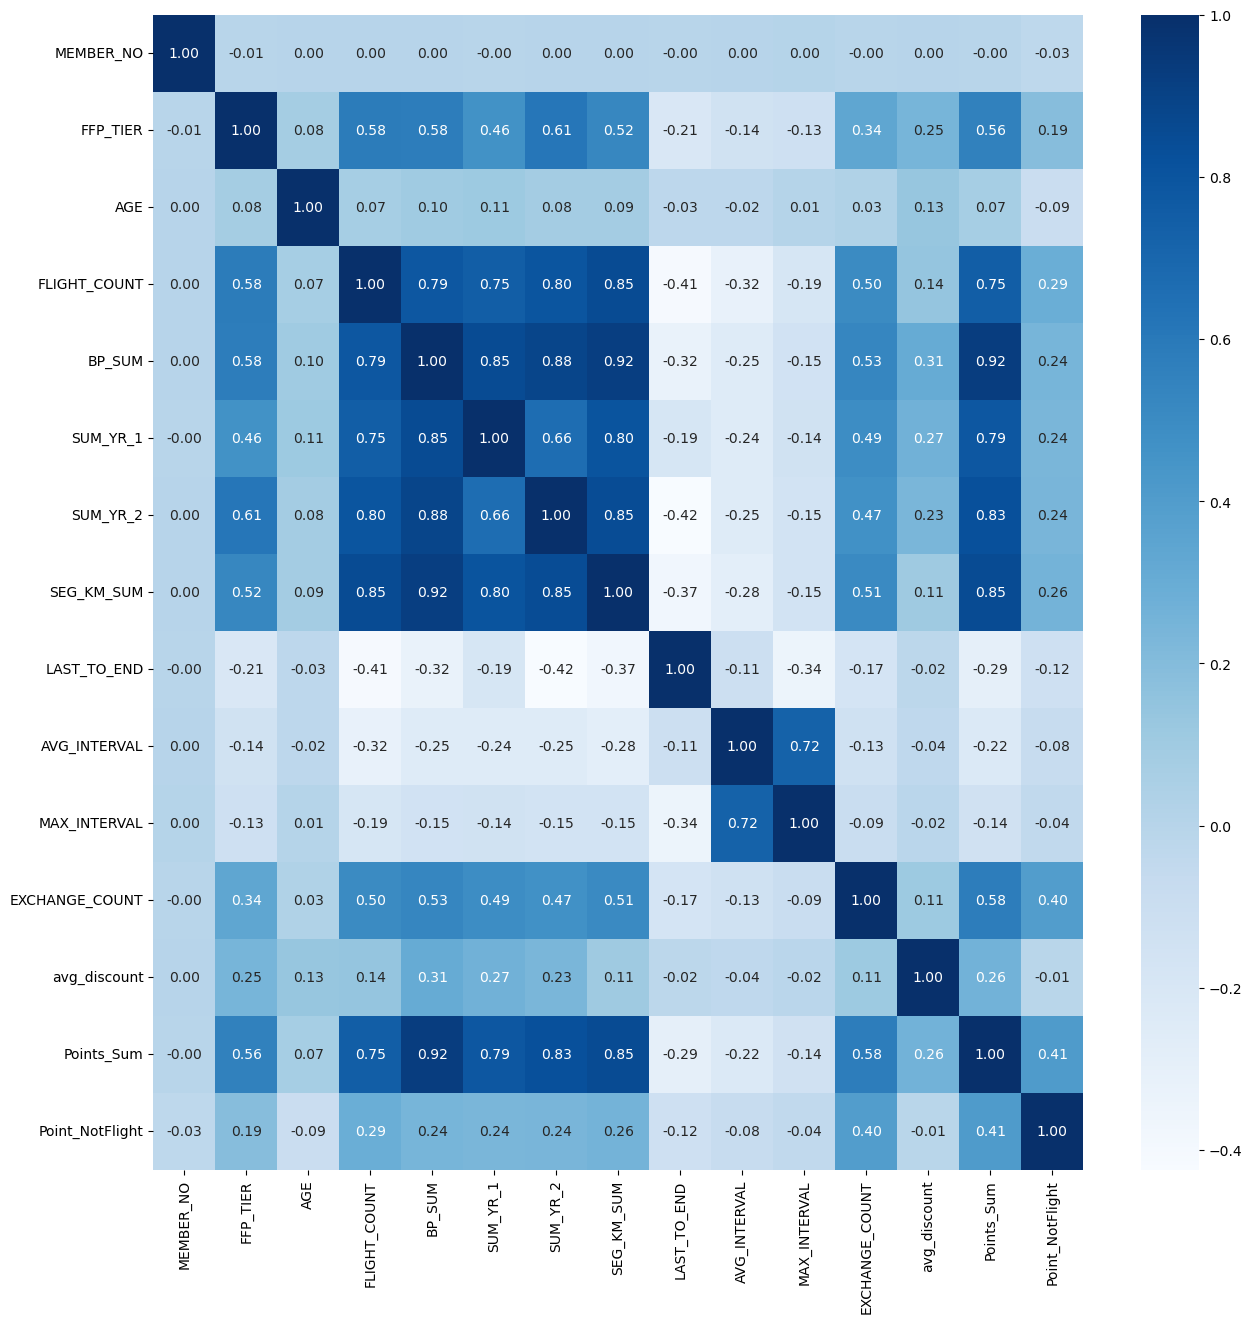

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [16]:
df.corr()

MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005675  0.001079      0.000266  0.000483   
FFP_TIER         -0.005675  1.000000  0.078442      0.582880  0.581200   
AGE               0.001079  0.078442  1.000000      0.073221  0.100449   
FLIGHT_COUNT      0.000266  0.582880  0.073221      1.000000  0.788254   
BP_SUM            0.000483  0.581200  0.100449      0.788254  1.000000   
SUM_YR_1         -0.002339  0.462917  0.111866      0.747938  0.850702   
SUM_YR_2          0.001409  0.612063  0.083645      0.795057  0.884696   
SEG_KM_SUM        0.000428  0.522764  0.087313      0.850121  0.921886   
LAST_TO_END      -0.002450 -0.207024 -0.026133     -0.405728 -0.319645   
AVG_INTERVAL      0.002490 -0.144527 -0.024618     -0.315931 -0.246027   
MAX_INTERVAL      0.004403 -0.127306  0.009253     -0.187643 -0.146989   
EXCHANGE_COUNT   -0.003226  0.342177  0.029247      0.502635  0.530331   
avg_discount      0.001757  0.248178  0.132987      0.139088  0.306383   
Points_Sum       -0.003006  0.559298  0.074712      0.746884  0.923269   
Point_NotFlight  -0.032454  0.193068 -0.092440      0.292401  0.244900   

                 SUM_YR_1  SUM_YR_2  SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
MEMBER_NO       -0.002339  0.001409    0.000428    -0.002450      0.002490   
FFP_TIER         0.462917  0.612063    0.522764    -0.207024     -0.144527   
AGE              0.111866  0.083645    0.087313    -0.026133     -0.024618   
FLIGHT_COUNT     0.747938  0.795057    0.850121    -0.405728     -0.315931   
BP_SUM           0.850702  0.884696    0.921886    -0.319645     -0.246027   
SUM_YR_1         1.000000  0.663141    0.804086    -0.186725     -0.242789   
SUM_YR_2         0.663141  1.000000    0.849373    -0.424135     -0.245463   
SEG_KM_SUM       0.804086  0.849373    1.000000    -0.370209     -0.279939   
LAST_TO_END     -0.186725 -0.424135   -0.370209     1.000000     -0.109315   
AVG_INTERVAL    -0.242789 -0.245463   -0.279939    -0.109315      1.000000   
MAX_INTERVAL    -0.144466 -0.153868   -0.154458    -0.344880      0.724942   
EXCHANGE_COUNT   0.488394  0.468496    0.507986    -0.170143     -0.129891   
avg_discount     0.268482  0.234012    0.108112    -0.021133     -0.038443   
Points_Sum       0.788238  0.826758    0.853018    -0.292562     -0.220194   
Point_NotFlight  0.235249  0.238781    0.259351    -0.124632     -0.075713   

                 MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
MEMBER_NO            0.004403       -0.003226      0.001757   -0.003006   
FFP_TIER            -0.127306        0.342177      0.248178    0.559298   
AGE                  0.009253        0.029247      0.132987    0.074712   
FLIGHT_COUNT        -0.187643        0.502635      0.139088    0.746884   
BP_SUM              -0.146989        0.530331      0.306383    0.923269   
SUM_YR_1            -0.144466        0.488394      0.268482    0.788238   
SUM_YR_2            -0.153868        0.468496      0.234012    0.826758   
SEG_KM_SUM          -0.154458        0.507986      0.108112    0.853018   
LAST_TO_END         -0.344880       -0.170143     -0.021133   -0.292562   
AVG_INTERVAL         0.724942       -0.129891     -0.038443   -0.220194   
MAX_INTERVAL         1.000000       -0.088936     -0.016224   -0.135007   
EXCHANGE_COUNT      -0.088936        1.000000      0.112525    0.578727   
avg_discount        -0.016224        0.112525      1.000000    0.263209   
Points_Sum          -0.135007        0.578727      0.263209    1.000000   
Point_NotFlight     -0.042445        0.396098     -0.010023    0.406935   

                 Point_NotFlight  
MEMBER_NO              -0.032454  
FFP_TIER                0.193068  
AGE                    -0.092440  
FLIGHT_COUNT            0.292401  
BP_SUM                  0.244900  
SUM_YR_1                0.235249  
SUM_YR_2                0.238781  
SEG_KM_SUM              0.259351  
LAST_TO_END            -0.124632  
AVG_INTERVAL           -0.075713

### PairPlot

<Figure size 1500x1500 with 0 Axes>

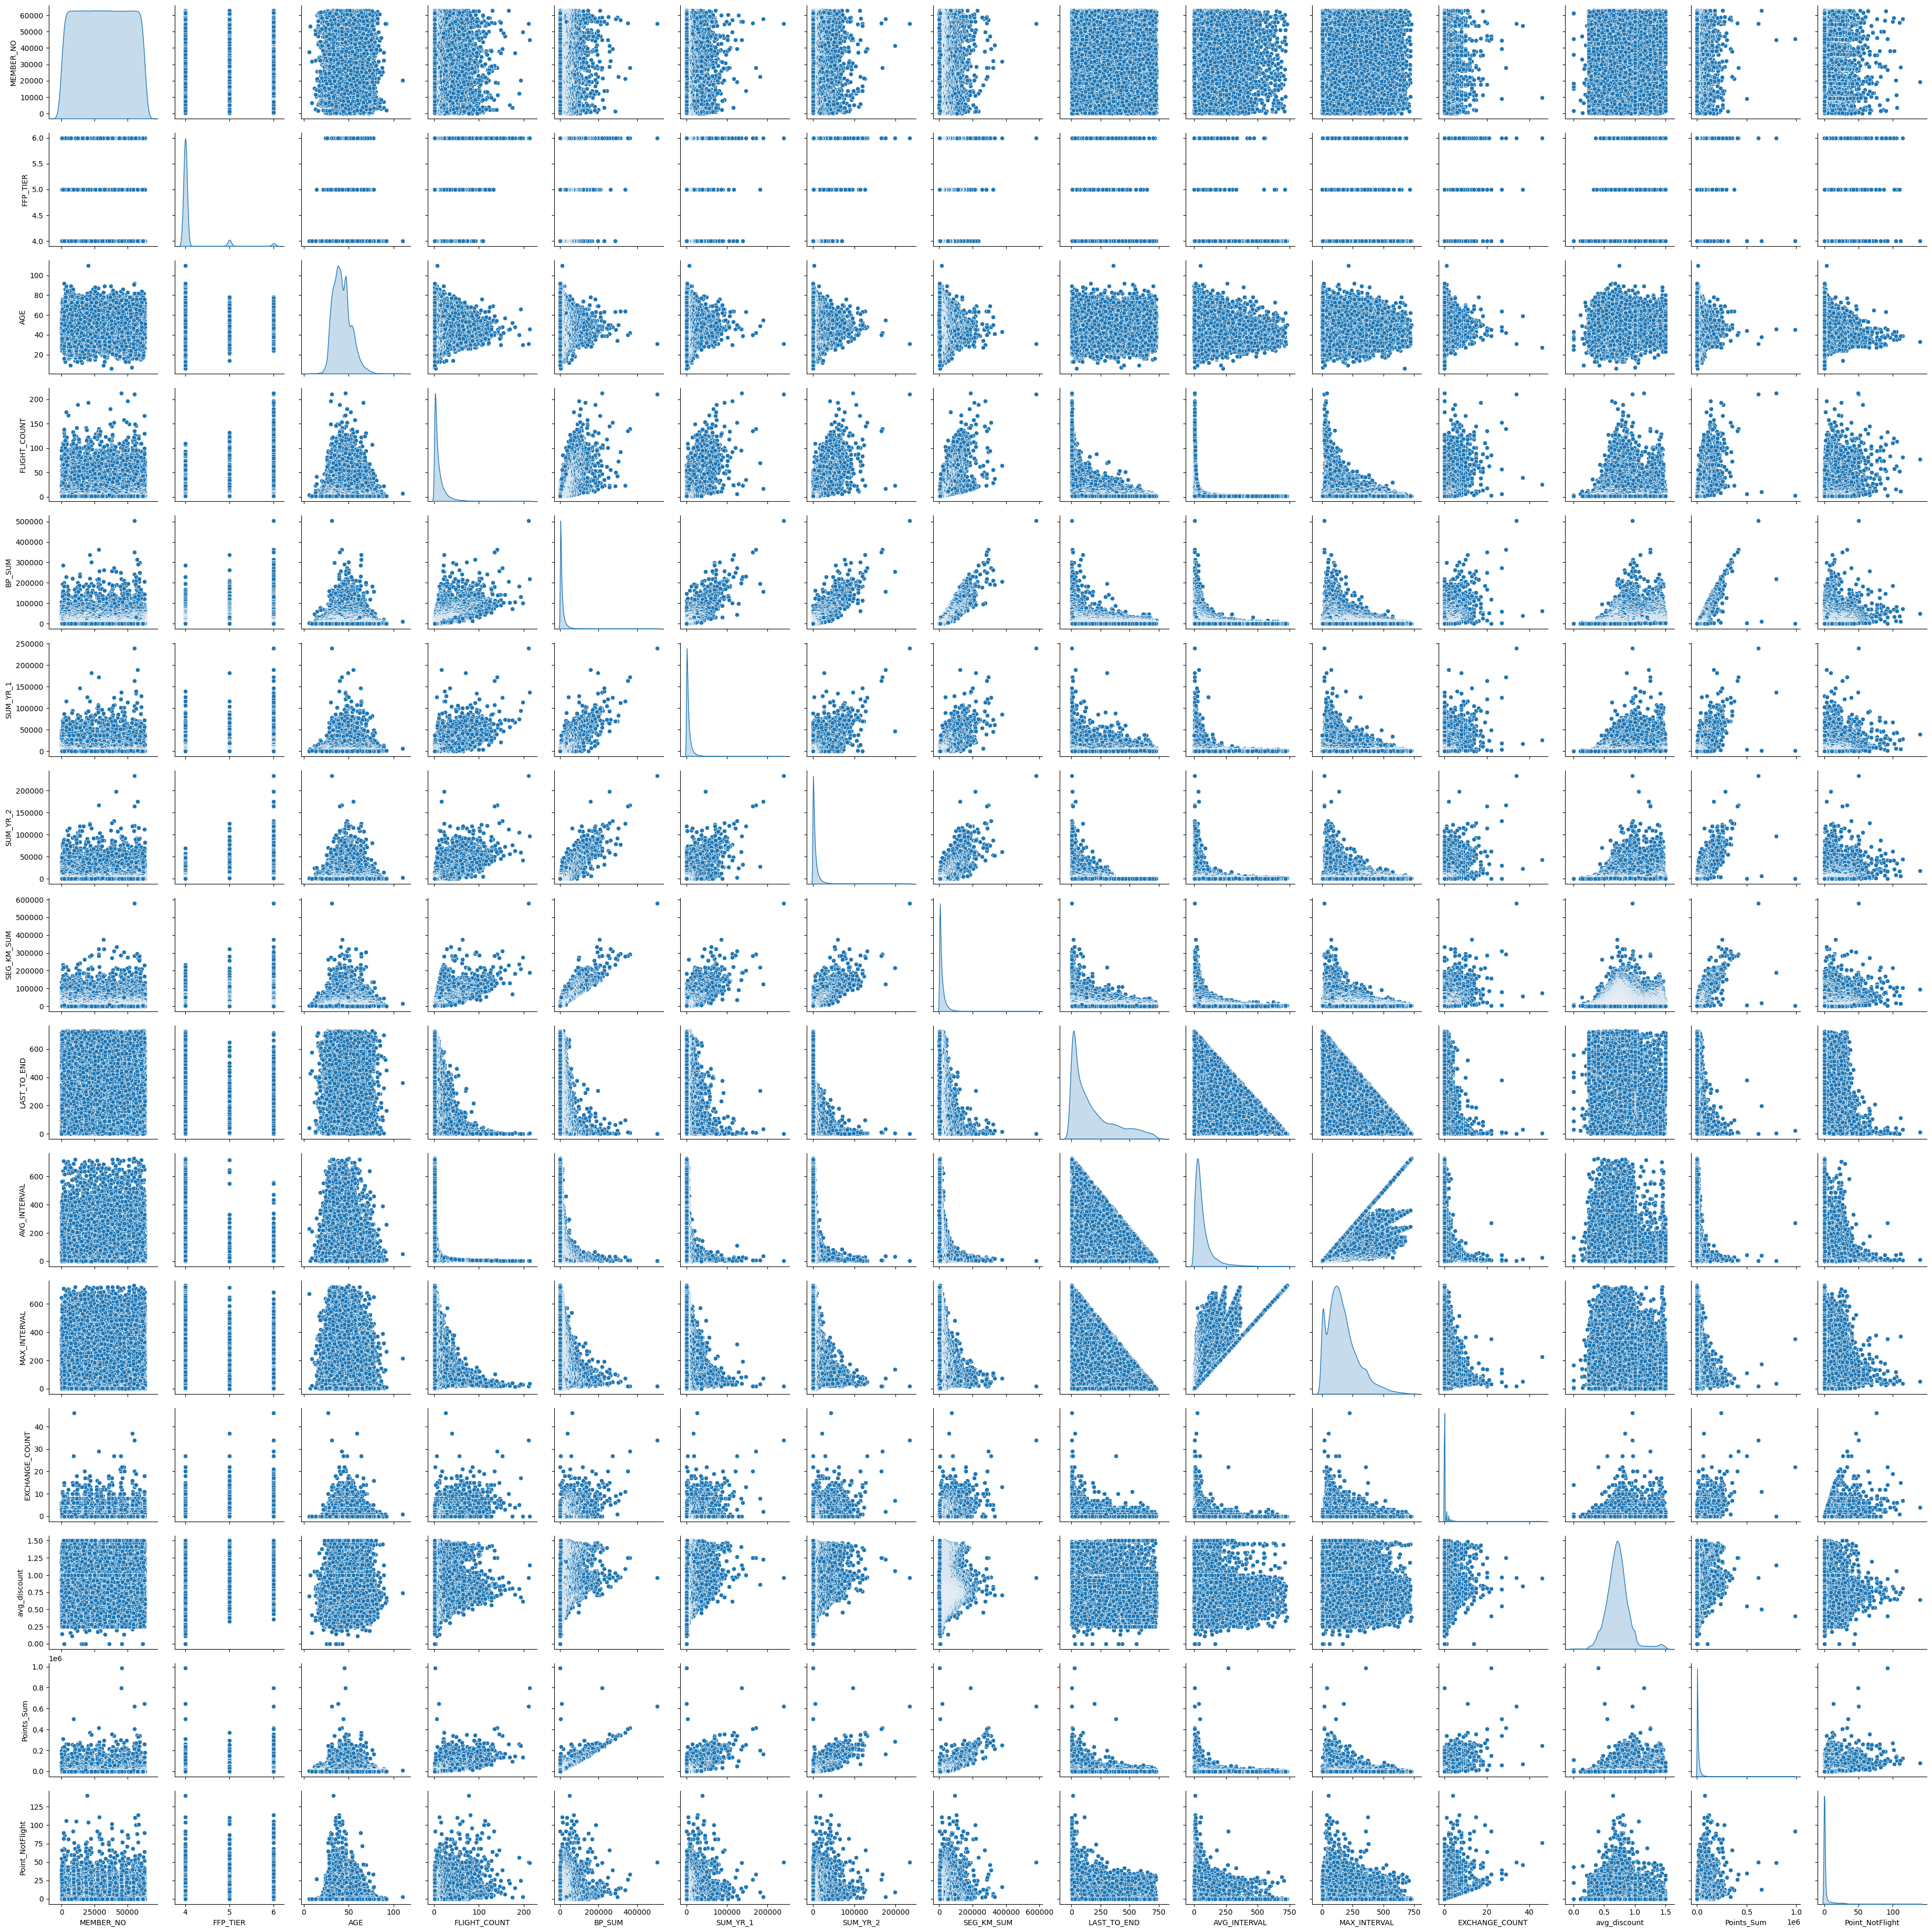

In [17]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

Terdapat korelasi linear di beberapa kolom pada Pairplot

### Data Preprocessing

#### Handling Missing Value

In [18]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage %'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage %', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage %']>0]
data_missing_value

feature  missing_value  percentage %
0  WORK_PROVINCE           3226         5.156
1      WORK_CITY           2255         3.604
2       SUM_YR_1            551         0.881
3            AGE            419         0.670
4       SUM_YR_2            138         0.221
5   WORK_COUNTRY             25         0.040
6         GENDER              3         0.005

Terdapat 7 Kolom missing value dengan persentasi terbesar ada pada kolom WORK_PROVINCE 5.156 %, Asumsi yang diambil jika missing value memiliki persentasi dibawah 1 % maka boleh di drop karena tidak terlalu mempengaruhi data

In [19]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
    df.dropna(subset=[col], inplace=True)

Sedangkan pada kolom WORK_PROVINCE & WORK_CITY akan disubtitusi nilai mode pada row data yang null

In [20]:
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)

In [21]:
 df.isnull().sum().reset_index()

index  0
0           MEMBER_NO  0
1            FFP_DATE  0
2   FIRST_FLIGHT_DATE  0
3              GENDER  0
4            FFP_TIER  0
5           WORK_CITY  0
6       WORK_PROVINCE  0
7        WORK_COUNTRY  0
8                 AGE  0
9           LOAD_TIME  0
10       FLIGHT_COUNT  0
11             BP_SUM  0
12           SUM_YR_1  0
13           SUM_YR_2  0
14         SEG_KM_SUM  0
15   LAST_FLIGHT_DATE  0
16        LAST_TO_END  0
17       AVG_INTERVAL  0
18       MAX_INTERVAL  0
19     EXCHANGE_COUNT  0
20       avg_discount  0
21         Points_Sum  0
22    Point_NotFlight  0

Tidak ada lagi data Null

### Handling Data Duplicates

In [22]:
df.duplicated().sum()

0

Tidak terdapat data Duplicates

### Penanganan Outliers 

Untuk  penanganan outliers kami mempertimbangkan dengan menggunakan Z-score untuk menentukan seberapa jauh suatu data berada dari rata-rata, dengan Z-score tinggi dianggap sebagai outlier atau nilai ekstrem,pertimbangan kami dengan memilih z-score dikarenakan kami tidak ingin kehilangan banyak data. Dikarenakan data nya tidak berdistribusi normal maka kami melakukan log transformasi terlebih dahulu.

In [23]:
# Sebelum dilakukan zscore, dicek terlebih dahulu, apakah terdapat negatif values
for i in nums:
    if (df[i] < 0).any():
        df[i] = df.apply(lambda x : int(0) if int(x[i]) < 0 else x[i], axis = 1)
    print(f"Total negative value of {i}:", (df[i] < 0).sum())

Total negative value of MEMBER_NO: 0
Total negative value of FFP_TIER: 0
Total negative value of AGE: 0
Total negative value of FLIGHT_COUNT: 0
Total negative value of BP_SUM: 0
Total negative value of SUM_YR_1: 0
Total negative value of SUM_YR_2: 0
Total negative value of SEG_KM_SUM: 0
Total negative value of LAST_TO_END: 0
Total negative value of AVG_INTERVAL: 0
Total negative value of MAX_INTERVAL: 0
Total negative value of EXCHANGE_COUNT: 0
Total negative value of avg_discount: 0
Total negative value of Points_Sum: 0
Total negative value of Point_NotFlight: 0


Tidak terdapat values dengan negativ values 

In [24]:
for i in nums:
    if i not in ['MEMBER_NO', 'FFP_TIER', 'avg_discount']:
        df[i] = np.log(df[i] + (df[df[i] > 0][i].min() / 2))

In [25]:
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT        BP_SUM  \
count  61437.000000  61437.000000  61437.000000  61437.000000  61437.000000   
mean   31486.068346      4.103260      3.794547      2.175372      8.677662   
std    18185.683471      0.375856      0.214767      0.832314      1.159408   
min        2.000000      4.000000      2.197225      1.098612      4.605170   
25%    15724.000000      4.000000      3.637586      1.386294      7.895063   
50%    31473.000000      4.000000      3.784190      2.079442      8.679312   
75%    47249.000000      4.000000      3.931826      2.772589      9.475930   
max    62988.000000      6.000000      4.727388      5.365976     13.133121   

           SUM_YR_1      SUM_YR_2    SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  \
count  61437.000000  61437.000000  61437.000000  61437.000000  61437.000000   
mean       7.573908      7.576519      9.272150      4.377464      3.697355   
std        1.804743      1.799166      0.990202      1.500632      1.168518   
min        3.988984      4.337291      6.313548      0.405465     -1.791759   
25%        6.979145      6.798498      8.523772      3.349904      3.173081   
50%        7.960324      7.967107      9.243098      4.677491      3.810359   
75%        8.801469      8.848868      9.981143      5.570251      4.414816   
max       12.386785     12.364206     13.272336      6.595097      6.590530   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount    Points_Sum  \
count  61437.000000    61437.000000  61437.000000  61437.000000   
mean       4.679672       -0.474554      0.721644      8.741730   
std        1.244937        0.576087      0.184845      1.284063   
min       -0.693147       -0.693147      0.000000      1.504077   
25%        4.400603       -0.693147      0.612500      7.952439   
50%        4.973280       -0.693147      0.711781      8.767874   
75%        5.435903       -0.693147      0.808987      9.577030   
max        6.590988        3.839452      1.500000     13.800982   

       Point_NotFlight  
count     61437.000000  
mean          0.047944  
std           1.230425  
min          -0.693147  
25%          -0.693147  
50%          -0.693147  
75%           0.405465  
max           4.945207

Terlihat dari `.describe()` bahwa data sudah berdistribusi normal dengan asumsi bahwa nilai mean berdekatan dengan nilai median

In [26]:
from scipy import stats

print("Before removing outlier: ", len(df))

for i in nums:
    if i not in ['MEMBER_NO', 'FFP_TIER', 'avg_discount']:
        z_scores = np.abs(stats.zscore(df[i]))
        df = df[z_scores <= 3]

print("After removing outlier: ", len(df))

Before removing outlier:  61437
After removing outlier:  55904


Setelah removing outlier dengan zscore terdapat 5.533 data yang diremove dari data 61.437 atau terdapat sekitar 0.009% data yang diremove

### Standardization Transformation

Untuk memastikan bahwa fitur memiliki skala yang serupa, sehingga setiap fitur memiliki kontribusi yang setara dalam pembentukan kelompok maka perlu dilakukan scalling, disini kami mempertimbangkan untuk menggunakan standardization dikarenakan standardization menjaga distribusi data asli.


In [27]:
df_std = df.copy()

In [29]:
num = df_std.select_dtypes(include = ['int64', 'float64']).columns

In [30]:
feats = df_std[num].columns

In [32]:
# Standardization
scaler = StandardScaler()
scaler.fit(df_std[num])
nums_std = scaler.transform(df_std[num])

In [33]:
# simpan di dataframe
df_std = pd.DataFrame(nums_std, columns = feats )

In [34]:
df_std.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT        BP_SUM  \
count  5.590400e+04  5.590400e+04  5.590400e+04  5.590400e+04  5.590400e+04   
mean  -2.491170e-17  6.751580e-16 -1.041207e-15 -8.134433e-17 -6.832924e-16   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -1.735678e+00 -2.560426e-01 -2.925647e+00 -1.408504e+00 -2.929043e+00   
25%   -8.681814e-01 -2.560426e-01 -7.503717e-01 -7.526108e-01 -7.192123e-01   
50%    1.847516e-03 -2.560426e-01 -5.639885e-02 -1.491326e-01 -6.717045e-03   
75%    8.675826e-01 -2.560426e-01  6.424616e-01  7.408590e-01  7.120324e-01   
max    1.731611e+00  5.580371e+00  3.004522e+00  3.180742e+00  3.157600e+00   

           SUM_YR_1      SUM_YR_2    SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  \
count  5.590400e+04  5.590400e+04  5.590400e+04  5.590400e+04  5.590400e+04   
mean  -3.416462e-16  2.277641e-16  2.603019e-16  8.134433e-18 -2.684363e-16   
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00   
min   -2.072619e+00 -1.917707e+00 -3.020347e+00 -2.685204e+00 -3.687284e+00   
25%   -3.278652e-01 -3.982298e-01 -7.434112e-01 -6.781331e-01 -6.253406e-01   
50%    2.231297e-01  2.205521e-01 -2.150532e-02  2.009660e-01 -3.164729e-03   
75%    6.797061e-01  7.007543e-01  7.233122e-01  7.869403e-01  6.407722e-01   
max    2.603947e+00  2.577339e+00  3.149741e+00  1.527392e+00  3.019836e+00   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount    Points_Sum  \
count  5.590400e+04    5.590400e+04  5.590400e+04  5.590400e+04   
mean  -4.880660e-16    2.033608e-16  3.741839e-16 -1.268972e-15   
std    1.000009e+00    1.000009e+00  1.000009e+00  1.000009e+00   
min   -3.645961e+00   -3.615732e-01 -3.440830e+00 -3.027899e+00   
25%   -4.162615e-01   -3.615732e-01 -6.042920e-01 -7.043208e-01   
50%    1.488525e-01   -3.615732e-01 -6.576242e-02  6.363439e-03   
75%    6.511894e-01   -3.615732e-01  4.689219e-01  7.081377e-01   
max    1.924070e+00    3.834326e+00  4.373153e+00  3.052964e+00   

       Point_NotFlight  
count     5.590400e+04  
mean      3.253773e-17  
std       1.000009e+00  
min      -5.858678e-01  
25%      -5.858678e-01  
50%      -5.858678e-01  
75%       3.756905e-01  
max       3.094281e+00

data sudah terstandardisasi dengan asumsi bahwa mean mendekati 0 dan standar deviasi mendekati 1

### Feature Engineering

Kami mempertimbangkan untuk membuat fitur baru yaitu `SUM_YR_1PER_FLIGHT` dengan kombinasi fitur `SUM_YR_1` dam `FLIGHT_COUNT`

In [36]:
df_std['SUM_YR_1_PER_FLIGHT'] = df_std['SUM_YR_1'] / df_std['FLIGHT_COUNT']

In [37]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55904 entries, 0 to 55903
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MEMBER_NO            55904 non-null  float64
 1   FFP_TIER             55904 non-null  float64
 2   AGE                  55904 non-null  float64
 3   FLIGHT_COUNT         55904 non-null  float64
 4   BP_SUM               55904 non-null  float64
 5   SUM_YR_1             55904 non-null  float64
 6   SUM_YR_2             55904 non-null  float64
 7   SEG_KM_SUM           55904 non-null  float64
 8   LAST_TO_END          55904 non-null  float64
 9   AVG_INTERVAL         55904 non-null  float64
 10  MAX_INTERVAL         55904 non-null  float64
 11  EXCHANGE_COUNT       55904 non-null  float64
 12  avg_discount         55904 non-null  float64
 13  Points_Sum           55904 non-null  float64
 14  Point_NotFlight      55904 non-null  float64
 15  SUM_YR_1_PER_FLIGHT  55904 non-null 

In [38]:
# Select features
features = ['FLIGHT_COUNT', 'SUM_YR_1', 'SEG_KM_SUM', 'SUM_YR_1_PER_FLIGHT', 'AGE']

Dari sekian banyak kolom, kami memilih 5 fitur yakni : <br>
* FLIGHT_COUNT (Jumlah penerbangan customer)
* SUM_YR_1 (Fare Revenue)
* SEG_KM_SUM (Total jarak (km) penerbangan yang sudah dilakukan)
* SUM_YR_1_PER_FLIGHT = SUM_YR_1 / FLIGHT_COUNT
* AGE (Umur customer)

Alasan kami memilih fitur-fitur tersebut yakni :
* FLIGHT_COUNT dapat menunjukkan intensitas penggunaan layanan penerbangan oleh customer. Customer dengan jumlah penerbangan yang tinggi kemungkinan besar adalah pelanggan yang aktif.
* SUM_YR_1 dapat menunjukkan nilai transaksi yang telah dilakukan oleh customer. Customer dengan nilai transaksi yang tinggi kemungkinan besar adalah customer yang loyal.
* SEG_KM_SUM dapat menunjukkan jarak total (dalam km) yang telah ditempuh oleh customer. Customer dengan jarak total yang tinggi kemungkinan besar adalah Customer yang sering bepergian.
* SUM_YR_1_PER_FLIGHT dapat menunjukkan nilai transaksi rata-rata per penerbangan. Fitur ini dapat digunakan untuk mengetahui apakah customer lebih suka melakukan penerbangan jarak jauh atau penerbangan jarak dekat.
* AGE dapat menunjukkan usia customer. Customer yang lebih tua kemungkinan besar memiliki tingkat pendapatan yang lebih tinggi dan lebih cenderung untuk bepergian.

Dengan menggunakan fitur-fitur ini, kita dapat melakukan clustering pelanggan berdasarkan intensitas penggunaan layanan penerbangan, nilai transaksi, jarak total yang ditempuh, jarak rata-rata per penerbangan, dan usia pelanggan. Clustering ini dapat membantu kita untuk memahami perilaku pelanggan dan mengelompokkan mereka ke dalam kategori yang berbeda-beda.